In [2]:

# scipy.sparse.csr_matrix
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
from scipy.integrate import solve_ivp
import importlib

import numpy as np
import matplotlib.pyplot as plt

import differential, function, animation
importlib.reload(differential)
from differential import make_differential_ops
importlib.reload(function)
from function import *
importlib.reload(animation)
from animation import *

## 実装の確認

dx= 0.1
Solving equation...
The solver successfully reached the end of the integration interval.
 Number of time steps : 44700
 Minimam time step    : 0.00021452693022183666
 Maximum time step    : 0.021841672858128866
dt = 0.1
shape of u(t, x) : (101, 1000)


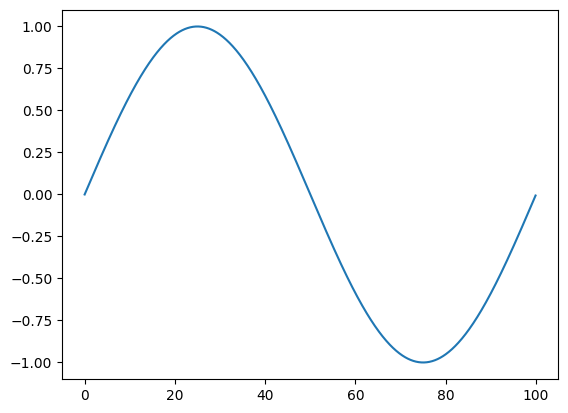

In [13]:
def solve_solit():
    # x mesh
    nx = 1000
    x_max = 100.0
    x = np.linspace(0, x_max, nx, endpoint=False)
    dx = x[1] - x[0]
    print("dx=", dx)

    # initial condition
    u0 = np.sin(x * (2.0 * np.pi / x_max))
    plt.plot(x, u0)

    # differential operators
    op_df1 = make_differential_ops(1, 4, nx, dx)
    op_df3 = make_differential_ops(3, 4, nx, dx)

    print("Solving equation...")
    t_max = 10.0
    sol = solve_ivp(f_kdv, (0, t_max), u0, dense_output=True, args=(op_df1, op_df3), rtol=1e-8)
    print(sol.message)
    print(" Number of time steps :", sol.t.size)
    print(" Minimam time step    :", min(np.diff(sol.t)))
    print(" Maximum time step    :", max(np.diff(sol.t)))

    # t mesh
    nt = 101
    t = np.linspace(0, t_max, nt)
    dt = t[1] - t[0]
    print("dt =", dt)

    # get u(t, x)
    u_xt = sol.sol(t)  # u(x, t)
    u_tx = u_xt.T  # u(t, x)
    print("shape of u(t, x) :", u_tx.shape)

    # Save results
    np.savez("../out/kdv_solve_ivp", x=x, t=t, u_tx=u_tx)

if __name__ == "__main__":
    main()

npz.files = ['x', 't', 'u_tx']
x.shape = (1000,)
t.shape = (101,)
u_tx.shape = (101, 1000)
Making animation...
saved as '../out/kdv_solve_ivp.gif'


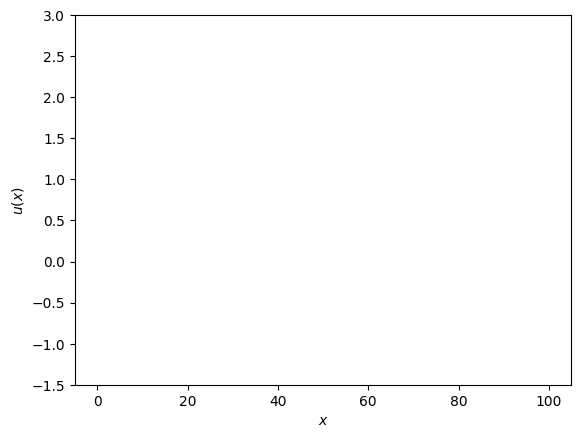

In [15]:
def main():
    # Load results
    npz = np.load("../out/kdv_solve_ivp.npz")
    print("npz.files =", npz.files)

    x = npz['x']
    t = npz['t']
    u_tx = npz['u_tx']
    print("x.shape =", x.shape)
    print("t.shape =", t.shape)
    print("u_tx.shape =", u_tx.shape)

    # make an animation
    print("Making animation...")
    save_animation(x, t, u_tx, ymin=-1.5, ymax=3.0, filename="../out/kdv_solve_ivp.gif")

main()